# Testing functions in epydemiology

## Import epydemiology
(All other packages will be imported or reported missing.)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import epydemiology as epy

/Users/phil/Documents/python_projects/general_python34_projects/env34/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  return f(*args, **kwds)


## Some background details

In [3]:
help(epy)

Help on package epydemiology:

NAME
    epydemiology

DESCRIPTION
    # These are the functions that can be accessed from epydemiology.
    # Other functions that are used internally cannot be accessed
    # directly by end-users.

PACKAGE CONTENTS
    phjCalculateProportions
    phjCleanUKPostcodes
    phjExploreData
    phjExtFuncs
    phjGetDBData
    phjGetData
    phjMatrices
    phjPrelimPrepForSelectData
    phjRROR
    phjSelectData

FILE
    /Users/phil/Documents/phjPyPI/epydemiology/epydemiology/__init__.py




In [4]:
print(dir(epy))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'getJenksBreaks', 'phjBinaryVarsToSquareMatrix', 'phjCalculateBinomialProportions', 'phjCalculateMultinomialProportions', 'phjCalculateProportions', 'phjCategoriseContinuousVariable', 'phjCleanUKPostcodeVariable', 'phjCleanUKPostcodes', 'phjExploreData', 'phjExtFuncs', 'phjGetDBData', 'phjGetData', 'phjGetDataFromDatabase', 'phjMatrices', 'phjOddsRatio', 'phjRROR', 'phjReadDataFromExcelNamedCellRange', 'phjReadTextFromFile', 'phjRelativeRisk', 'phjSelectCaseControlDataset', 'phjSelectData', 'phjViewLogOdds']


---

## File: phjCalculateProportions

### Function: phjCalculateBinomialProportions()

In [5]:
# Create example dataset

### Function: phjCalculateMultinomialProportions()

In [6]:
# Create example dataset

---

## File: phjSelectData

### Function: phjSelectCaseControlDataset()

In [7]:
# Create example dataset
casesDF = pd.DataFrame({'animalID':[1,2,3,4,5],'var1':[43,45,34,45,56],'sp':['dog','dog','dog','dog','dog']})
potControlsDF = pd.DataFrame({'animalID':[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
                              'var1':[34,54,34,23,34,45,56,67,56,67,78,98,65,54,34,76,87,56,45,34],
                              'sp':['dog','cat','dog','dog','cat','dog','cat','dog','cat','dog',
                                    'dog','dog','dog','cat','dog','cat','dog','dog','dog','cat']})

print("This dataframe contains all the cases of disease\n")
print(casesDF)
print("\n")
print("This dataframe contains all the animals you could potentially use as controls\n")
print(potControlsDF)
print("\n")

# Selecting unmatched controls
unmatchedDF = epy.phjSelectCaseControlDataset(phjCasesDF = casesDF,
                                              phjPotentialControlsDF = potControlsDF,
                                              phjUniqueIdentifierVarName = 'animalID',
                                              phjMatchingVariablesList = None,
                                              phjControlsPerCaseInt = 2,
                                              phjPrintResults = False)

print(unmatchedDF)
print("\n")

# Selecting controls that are matched to cases on variable 'sp'
matchedDF = epy.phjSelectCaseControlDataset(phjCasesDF = casesDF,
                                            phjPotentialControlsDF = potControlsDF,
                                            phjUniqueIdentifierVarName = 'animalID',
                                            phjMatchingVariablesList = ['sp'],
                                            phjControlsPerCaseInt = 2,
                                            phjPrintResults = False)

print(matchedDF)

This dataframe contains all the cases of disease

   animalID   sp  var1
0         1  dog    43
1         2  dog    45
2         3  dog    34
3         4  dog    45
4         5  dog    56


This dataframe contains all the animals you could potentially use as controls

    animalID   sp  var1
0         11  dog    34
1         12  cat    54
2         13  dog    34
3         14  dog    23
4         15  cat    34
5         16  dog    45
6         17  cat    56
7         18  dog    67
8         19  cat    56
9         20  dog    67
10        21  dog    78
11        22  dog    98
12        23  dog    65
13        24  cat    54
14        25  dog    34
15        26  cat    76
16        27  dog    87
17        28  dog    56
18        29  dog    45
19        30  cat    34


UNMATCHED CONTROLS

    case  animalID
0      1         1
1      1         2
2      1         3
3      1         4
4      1         5
5      0        22
6      0        20
7      0        12
8      0        30
9      0       

---

## File: phjExploreData

### Function: phjCategoriseContinuousVariable()

#### Return dataframe alone

In [8]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# Categorise a continuous variable
phjTempDF = epy.phjCategoriseContinuousVariable(phjTempDF = phjTempDF,
                                                phjContinuousVarName = 'riskFactorCont',
                                                phjMissingValue = 'missing',
                                                phjNumberOfCategoriesInt = 6,
                                                phjNewCategoryVarName = 'catVar',
                                                phjCategorisationMethod = 'jenks',
                                                phjReturnBreaks = False,
                                                phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print('\nLog odds for categorised variable')
    print(phjTempDF)

      binDepVar  riskFactorCont
0           yes        0.233029
1           yes        0.419627
2           yes        0.833248
3           yes        0.376651
4           yes        0.065051
...         ...             ...
99995        no        0.341591
99996        no        0.106766
99997        no        0.804538
99998        no        0.270812
99999        no        0.273346

[100000 rows x 2 columns]

Log odds for categorised variable
      binDepVar  riskFactorCont  catVar
0           yes        0.233029       1
1           yes        0.419627       2
2           yes        0.833248       4
3           yes        0.376651       2
4           yes        0.065051       0
...         ...             ...     ...
99995        no        0.341591       1
99996        no        0.106766       0
99997        no        0.804538       4
99998        no        0.270812       1
99999        no        0.273346       1

[100000 rows x 3 columns]


#### Return dataframe and list of breaks

In [9]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# Categorise a continuous variable
phjTempDF, phjBreaksList = epy.phjCategoriseContinuousVariable(phjTempDF = phjTempDF,
                                                               phjContinuousVarName = 'riskFactorCont',
                                                               phjMissingValue = 'missing',
                                                               phjNumberOfCategoriesInt = 6,
                                                               phjNewCategoryVarName = 'catVar',
                                                               phjCategorisationMethod = 'jenks',
                                                               phjReturnBreaks = True,
                                                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print('\nCategorised variable')
    print(phjTempDF)
    print('\n')
    print('Breaks')
    print(phjBreaksList)

      binDepVar  riskFactorCont
0           yes        0.413018
1           yes        0.009638
2           yes        0.661134
3           yes        0.755140
4           yes        0.341305
...         ...             ...
99995        no        0.135354
99996        no        0.387370
99997        no        0.391701
99998        no        0.066896
99999        no        0.844374

[100000 rows x 2 columns]

Categorised variable
      binDepVar  riskFactorCont  catVar
0           yes        0.413018       2
1           yes        0.009638       0
2           yes        0.661134       3
3           yes        0.755140       4
4           yes        0.341305       1
...         ...             ...     ...
99995        no        0.135354       0
99996        no        0.387370       2
99997        no        0.391701       2
99998        no        0.066896       0
99999        no        0.844374       5

[100000 rows x 3 columns]


Breaks
[8.9802259531740488e-06, 0.18062839719873769, 0.360

### Function: phjViewLogOdds()
Example of viewing log odds plotted against mid-point of categories.

#### Categorise using Jenks breaks and using 'yes' and 'no' as binary outcome

      binDepVar  riskFactorCont
0           yes        0.885007
1           yes        0.398733
2           yes        0.088841
3           yes        0.047183
4           yes        0.173154
...         ...             ...
99995        no        0.498419
99996        no        0.143683
99997        no        0.390726
99998        no        0.400637
99999        no        0.534702

[100000 rows x 2 columns]


/Users/phil/Documents/phjPyPI/epydemiology/epydemiology/phjRROR.py:70: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  phjContTable.set_value(phjStratum,'95pcCI_Woolf',phjRiskFactorCI)


Log odds for categorised variable
                  yes     no      odds        or      95pcCI_Woolf   logodds  \
categoricalVar                                                                 
0               10361  10332  1.002807  1.027789  [0.9884, 1.0687]  0.002803   
1                9674   9915  0.975693  1.000000               --- -0.024607   
2               10135  10036  1.009864  1.035022  [0.9951, 1.0765]  0.009816   
3               10156  10174  0.998231  1.023099  [0.9837, 1.0641] -0.001771   
4                9674   9543  1.013727  1.038981  [0.9984, 1.0812]  0.013634   

                      se  95CI_llimit  95CI_ulimit  catMidpoints  
categoricalVar                                                    
0               0.013903    -0.024447     0.030053      0.104146  
1               0.014291    -0.052616     0.003403      0.305866  
2               0.014082    -0.017785     0.037417      0.503397  
3               0.014027    -0.029263     0.025721      0.704615  
4  

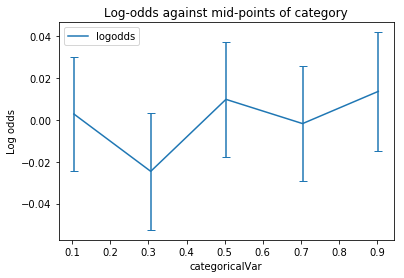

In [10]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':['yes']*50000 + ['no']*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# View log odds
phjTempDF = epy.phjViewLogOdds(phjTempDF = phjTempDF,
                               phjBinaryDepVarName = 'binDepVar',
                               phjContIndepVarName = 'riskFactorCont',
                               phjCaseValue = 'yes',
                               phjMissingValue = 'missing',
                               phjNumberOfCategoriesInt = 5,
                               phjNewCategoryVarName = 'categoricalVar',
                               phjCategorisationMethod = 'jenks',
                               phjGroupNameVar = None,
                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 10):
    print('Log odds for categorised variable')
    print(phjTempDF)

#### Categorise using quantile breaks and using 1 and 0 as binary outcome

       binDepVar  riskFactorCont
0              1        0.260246
1              1        0.487985
2              1        0.922498
3              1        0.449533
4              1        0.479241
...          ...             ...
99995          0        0.902317
99996          0        0.625651
99997          0        0.294277
99998          0        0.448437
99999          0        0.746110

[100000 rows x 2 columns]


/Users/phil/Documents/phjPyPI/epydemiology/epydemiology/phjRROR.py:70: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  phjContTable.set_value(phjStratum,'95pcCI_Woolf',phjRiskFactorCI)


Log odds for categorised variable
                   1     0      odds        or      95pcCI_Woolf   logodds  \
categoricalVar                                                               
0               6305  6389  0.986852  1.010489  [0.9619, 1.0616] -0.013235   
1               6221  6370  0.976609  1.000000               --- -0.023669   
2               6254  6122  1.021562  1.046029  [0.9954, 1.0992]  0.021332   
3               6201  6288  0.986164  1.009784  [0.9610, 1.0610] -0.013932   
4               6366  6088  1.045664  1.070708  [1.0189, 1.1251]  0.044652   
5               6239  6259  0.996805  1.020679  [0.9714, 1.0725] -0.003201   
6               6244  6253  0.998561  1.022477  [0.9731, 1.0744] -0.001440   
7               6170  6231  0.990210  1.013927  [0.9649, 1.0655] -0.009838   

                      se  95CI_llimit  95CI_ulimit  catMidpoints  
categoricalVar                                                    
0               0.017752    -0.048028     0.021558 

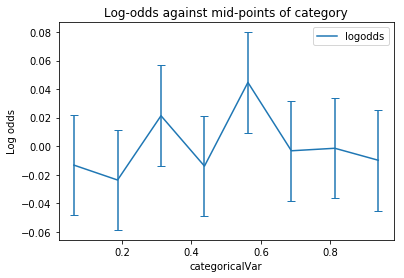

In [11]:
# Define example dataset
phjTempDF = pd.DataFrame({'binDepVar':[1]*50000 + [0]*50000,
                          'riskFactorCont':np.random.uniform(0,1,100000)})

with pd.option_context('display.max_rows', 10, 'display.max_columns', 5):
    print(phjTempDF)

    
# View log odds
phjTempDF = epy.phjViewLogOdds(phjTempDF = phjTempDF,
                               phjBinaryDepVarName = 'binDepVar',
                               phjContIndepVarName = 'riskFactorCont',
                               phjCaseValue = 1,
                               phjMissingValue = 'missing',
                               phjNumberOfCategoriesInt = 8,
                               phjNewCategoryVarName = 'categoricalVar',
                               phjCategorisationMethod = 'quantile',
                               phjGroupNameVar = None,
                               phjPrintResults = False)

with pd.option_context('display.max_rows', 10, 'display.max_columns', 10):
    print('Log odds for categorised variable')
    print(phjTempDF)

---